In [1]:
import os
import random

import pandas as pd
from bertopic import BERTopic
from nltk.tokenize import word_tokenize
from utils.filemanagement import load_from_file
from utils.filemanagement import get_project_root
from utils.config import random_sample,seed

In [2]:
model_type="bertopic"
model_name="BERTopic"
experiment="embedding"
embedding_model = "all-roberta-large-v1"
data_type="np_mini_stopwords"
file_name_data = f"{data_type}.csv"
file_name = f"{model_type}_{embedding_model}_{data_type}"
folder_path_topics = f"preprocessed_data/results/embedding/{model_type}"
folder_path_data =f"preprocessed_data"
df = load_from_file(folder_path_data,file_name_data)
TOPN = 20
folder_path_word_cloud = f"preprocessed_data/wordclouds/{experiment}/{model_type}/{file_name}"

folder_name = f"Embedding-experiment/models/{model_type}"

ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)




In [3]:
data = df.text.values.tolist()
timestamps = df.date.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))

In [4]:
from sentence_transformers import SentenceTransformer

emb_model = SentenceTransformer("all-roberta-large-v1")

In [5]:
topic_model = BERTopic(embedding_model=emb_model)
try:
    topic_model = topic_model.load(file_path)
except:
    print("correctly")
    topics,probs = topic_model.fit_transform(documents=new_data)

In [6]:
topic_model.get_topic_info()

Topic  Count                                               Name
0      -1   1314  -1_norge_regjeringen_representanten_fremskritt...
1       0    290           0_energi_regjeringen_gasskraftverk_norge
2       1    235                    1_skolen_skole_elever_utdanning
3       2    178   2_statsråden_statsministeren_stortinget_spørsmål
4       3    166             3_statsråden_transportplan_kr_nasjonal
5       4    151             4_kommunene_kommunane_kommuner_kommune
6       5     94  5_senterpartiet_arbeiderpartiet_folkeparti_kri...
7       6     61  6_finansministeren_finanskrisen_finansnæringen...
8       7     50                          7_kr_mill_pst_regjeringen
9       8     46                8_mat_landbruk_landbruket_økologisk
10      9     45         9_kriminalitet_fengsel_politiet_kriminelle
11     10     40       10_kultur_kulturløftet_kulturen_kulturskolen
12     11     39                  11_barn_vold_barnevernet_foreldre
13     12     38  12_rehabilitering_behandling_pasienter_pasientene
14     13     37  13_høyre_arbeiderpartiet_økonomiske_representa...
15     14     35        14_afghanistan_militære_nato_internasjonale
16     15     35           15_muslimske_religion_bønnerop_religiøse
17     16     35       16_representanten_arbeiderpartiet_tror_høyre
18     17     34  17_vegne_representantene_representantforslag_s...
19     18     34  18_bidragsreglene_mattilsynet_regelverket_innkjøp
20     19     33          19_fly_statsråden_utenriksministeren_land
21     20     31          20_statsråden_m2_mattilsynet_miljømerking
22     21     30  21_helseministeren_samhandlingsreformen_ombude...
23     22     28                             22_nato_fn_russland_eu
24     23     27          23_jagland_politikk_arbeiderpartiet_norge
25     24     26                  24_alkohol_øl_vin_alkoholpolitikk
26     25     25                             25_stemme_kap_post_svs
27     26     23                  26_syria_politisk_verdikamp_norge
28     27     22               27_psykiske_psykisk_behandling_tvang
29     28     22  28_asylsøkere_asylinstituttet_asyl_asylpolitikken
30     29     21             29_informasjon_uføre_svenske_regjering
31     30     20  30_operasjoner_forsvaret_forsvarsministeren_delta
32     31     18  31_konkurransetilsynet_personer_lovavdelingen_...
33     32     18                 32_signal_aetat_kystvakta_signaler
34     33     18           33_skattemeldingen_norge_bedrifter_skatt
35     34     18  34_kommunene_senterpartiet_lokalpolitikerne_di...
36     35     17          35_interpellanten_barn_samlivsbrudd_barna
37     36     17  36_private_vegvedlikehaldet_høgre_privatprakti...
38     37     16         37_barnevernet_biologiske_barn_akuttvedtak
39     38     16            38_representanten_innkjøp_aetat_reglane
40     39     15  39_fremskrittspartiet_golfbaner_fremskrittspar...
41     40     15  40_justisministeren_mellombels_politiets_væpninga
42     41     15                         41_land_arbeid_norge_uføre
43     42     15             42_israel_palestinsk_palestinske_hamas
44     43     14  43_presidenten_president_spanskekongen_felless...
45     44     14  44_voldsoffererstatning_overgriper_permitterin...
46     45     14                        45_irak_burma_irakiske_krig
47     46     13                46_barn_barnevernet_fosterhjem_full
48     47     13                           47_renten_bank_renta_lav
49     48     13             48_ous_lærarar_helsevesenet_fagmiljøer
50     49     12                         49_nrk_monopol_dab_radioen
51     50     12                         50_film_filmen_filmer_kino
52     51     11  51_organisasjoner_organisasjonene_fylkesnemnde...
53     52     11                52_landene_land_frihandel_fattigste
54     53     10      53_eosutvalget_kontroll_pengane_skatteetatens

In [7]:
topics = topic_model.get_topics()

In [8]:
topic_model.visualize_topics()

In [9]:
erk = topic_model.get_representative_docs(0)

In [10]:
print(erk)

['enig representanten solvikolsen gledens tro fremskrittspartiet bekymret svs propagandamateriell gjelder debatten gass saken minne fremskrittspartiet innenlands gass sentral framtidens verdiskaping industriutvikling norge fremskrittspartiet innimellom inne strekker saken gjenstand debatt offentligheten salen forrige inneværende periode kunnskapsnivået bevisstheten grønne sertifikater ført langvarig konsistent debatt støtteordninger energiproduksjon energisparing avgjørende fornybar energi klimamålene land norge særtilfelle kraftforsyning ren fornybar energi lene områder trenger tilgang kraft framtiden tror føle beroliget norge dømme overskuddsområde kraft endringer sagt norge stolt historie fornybarnasjon elsiden felles grønt sertifikatmarked sverige legges rette kapittel fortellingen land europa rute gjelder målene hindre ukontrollert global oppvarming riktignok overgang kull gass elforsyningen land gir kraftig redusert utslipp mål markedet grønne sertifikater plasserer norge front p

In [11]:
for item in erk:
    print(len(item))

2212
5570
5079


In [12]:
ark = "først vil jeg takke komiteen for et godt samarbeid om budsjettet. jeg vil rette en spesiell takk til kristelig folkeparti og venstre, som gjennom budsjettforliket her på stortinget har vært med på å styrke utdannings- og forskningsbudsjettet ytterligere. et av regjeringens hovedprosjekter er å videreutvikle kunnskapssamfunnet, dette fordi kunnskap gir framtidsmuligheter for den enkelte, uansett bakgrunn, og danner grunnlaget for sosial mobilitet i samfunnet. kunnskap er avgjørende for å styrke norsk konkurransekraft og for å bygge landet for framtiden. dette budsjettet følger opp regjeringens ambisjoner gjennom en historisk satsing på skolen, utdanningsinstitusjonene, studentene og forskningsmiljøene. ingenting betyr mer for elevenes læring enn lærerens kompetanse og evne til å lære bort. fremskrittspartiet er glad for at regjeringen fortsetter den store satsingen på videreutdanning av lærerne. satsingen sikrer at totalt 5 050 lærere og 500 skoleledere får tilbud om videreutdanning innen strategien kompetanse for kvalitet fra høsten 2015. jeg er trygg på at den satsingen vil gi målbare resultater. det arbeider i dag mange lærere i den norske skolen som ikke har kompetanse til å undervise i det faget de underviser i. fremskrittspartiet er derfor positiv til at det i budsjettforliket ble bevilget 50 mill. kr til et kompetanseløft for ufaglærte med jobb i skolen. vi ser på dette som et godt tiltak for at flere kan kvalifisere seg til yrket. tidlig innsats er et av de viktigste tiltakene for at flere skal lykkes i skolen. for å ivareta tidlig innsats ble det i budsjettforliket satt av 200 mill. kr til å styrke lærertettheten i 1.–4. klasse fra høsten 2015. det er en forutsetning at stillingene skal besettes av lærere med formell kompetanse. fremskrittspartiet forventer at dette vil forsterke trykket på tidlig innsats og individuell tilpasning. internasjonale undersøkelser viser at norske elever presterer under eller om lag på gjennomsnittet for oecd i både matematikk og naturfag. matematikk er det faget flest elever får karakter 1 og 2 i på ungdomsskolen, og som flest elever stryker i på videregående skole. dette tyder på at vi har et realfagsproblem i skolen. gode realfagskunnskaper har bidratt til at norge bl.a. er verdensledende innen maritim sektor, olje og gass. fremskrittspartiet mener at behovet for realfagskunnskaper vil være av vital betydning for det som vi også skal leve av i framtiden. fremskrittspartiet er positiv til at regjeringen er på gang med en ny realfagsstrategi i 2015. strategien innebærer bl.a. oppretting av realfagskommuner og har til hensikt å stimulere kommuner til å ta helhetlig ansvar for å forbedre realfagskunnskapene til barn og unge. ekspertgruppen for realfag som departementet opprettet, har nå levert sin rapport og kommet med en mengde konkrete forslag til hvordan elevene skal bli bedre i matematikk og naturfag. samarbeidsavtalen mellom regjeringspartiene og kristelig folkeparti og venstre viderefører regjeringens satsing på yrkesfagløftet, som ble startet i 2014. avtalen gjør at lærlingtilskuddet økes til 7 500 kr totalt per lærekontrakt. før fremskrittspartiet tiltrådte regjeringskontorene, hadde dette tilskuddet stått på stedet hvil i fem år. ssb-prognoser viser at vi vil mangle ca. 134 000 fagarbeidere i 2030. regjeringens yrkesfagløft, som startet i 2014, innebar styrking av praksisbrevordningen, vekslingsmodellen, hospiteringsordningen for lærerne, tilskudd til nye lærebedrifter og yrkesretting av fellesfag. disse tilbudene videreføres neste år. i tillegg videreføres ordningen med at yrkesfaglærere kan hospitere i bedrift, og at folk fra yrkeslivet kan hospitere i skolen. det er bevilget 8 mill. kr til kompetanseheving for yrkesfaglærere i budsjettet for 2015. dette er en ny og viktig satsing. for at elevene på videregående yrkesfag skal få fullføre sin utdanning i bedrift, er det behov for langt flere læreplasser. den foreslåtte økningen i lærlingtilskuddet vil forhåpentligvis gi flere plasser, men fremskrittspartiet er opptatt av å minne om at statsråden nøye må følge opp den inngåtte samfunnskontrakten slik at forpliktelsen til å øke antall læreplasser blir innfridd. jeg må også legge til at fremskrittspartiet har forventninger om en enda større satsing på yrkesfagløftet neste år. mennesker er norges viktigste ressurs, og den menneskelige kapitalen utgjør ca. 80 pst. av nasjonalformuen. av ulike grunner må mange skifte yrke, innholdet i etablerte yrker endres, og stadig utvikling av nye arbeidsmetoder krever at mange må tilegne seg nye ferdigheter i voksen alder. fremskrittspartiet mener at det er stort behov for gode og oversiktlige utdanningstilbud til voksne. derfor er fremskrittspartiet svært positiv til at regjeringen har satt i gang en rekke tiltak som vil styrke voksnes læring, bl.a. ved å utarbeide en rettleder for realkompetansevurdering ved opptak til fagskoler og til realkompetansevurdering for fritak til høyere utdanning. den har satt i gang lokale tilbud om etterutdanning for lærere og andre som underviser i voksenopplæringen. det foreslås å utvikle et kartleggingsverktøy som har til hensikt å øke voksnes deltaking i og gjennomføring av opplæring, og å gjøre opplæringstilbyderne i stand til å gi bedre tilpasset og tilrettelagt opplæring. det skal også utvikles et helhetlig system for karriereveiledning for voksne. regjeringen legger med dette budsjettet fram en sterkere satsing på høyere utdanning og på studentvelferd enn i noe tidligere statsbudsjett. regjeringen øker studiefinansieringen med 3,1 pst., noe som er godt over forventet prisvekst. i budsjettforliket legger vi opp til bygging av 2 000 hybelenheter i 2015. det er så mye som en dobling sammenlignet med de rød-grønnes siste budsjett. videre blir frikortgrensen økt fra 40 000 til 50 000 kr, noe som kommer våre studenter til gode. alt i alt legger regjeringens budsjett opp til at studentene kan bruke mer tid på studiene. fremskrittspartiet mener det er samfunnsøkonomisk klokt. høyre–fremskrittsparti-regjeringen la sammen med budsjettet fram meld. st. 7 for 2014–2015, langtidsplan for forskning og høyere utdanning 2015–2024. planen inneholder en rekke store og forpliktende opptrappinger over tid, men startskuddet går allerede i 2015. regjeringen bevilger 100 mill. kr til å utvikle flere verdensledende fagmiljøer. eu er vår største forskningspartner, og vi har i dag verdens største forskningssamarbeid gjennom horisont 2020. det er viktig for norge å delta i de store forskningssamarbeidene, bl.a. for å få tilgang til sterke fagmiljøer og kontakt med verdensledende forskere. i dag klarer vi ikke å tilbakeføre en tilfredsstillende andel av midlene vi bidrar med inn i prosjektet. derfor er jeg fornøyd med at regjeringen bevilger 115 mill. kr til stimuleringsordninger, deriblant gjennom stim-eu, for å legge til rette for større deltagelse i horisont 2020. budsjettforliket, som regjeringspartiene har inngått med kristelig folkeparti og venstre, viderefører de viktigste satsingene i regjeringens forslag til statsbudsjett for 2015, og trygger dermed vekst og verdiskaping i hele landet. budsjettforliket resulterte bl.a. i 100 nye rekrutteringsstillinger utover regjeringens forslag til statsbudsjett. dette gir sektoren nærmere 150 nye rekrutteringsstillinger neste år. fremskrittspartiet er godt fornøyd med at det blir lagt til rette for økt forskningsinnsats ved norske utdanningsinstitusjoner. regjeringens kunnskapssatsing er viktig for å gi alle muligheter til aktiv deltagelse i samfunnet, men også for å styrke vår konkurransekraft. konkurransen om kunnskapen er global, og vi konkurrerer i realiteten mot alle andre verdens land. norge kan aldri konkurrere mot lavkostland på pris, men vi kan konkurrere på smarte løsninger og god kvalitet. ifølge nifu har offentlige bevilgninger til forskning aldri tidligere utgjort en høyere andel av bruttonasjonalproduktet. dette budsjettet viser med all tydelighet at regjeringen og stortingsflertallet prioriterer å satse på utdanning og forskning. det gleder fremskrittspartiet, og det ruster landet for framtiden. tro, religion og livssyn spiller en viktig rolle i det norske samfunnet, både for fellesskapet og for enkeltmennesker, og den norske kirke står sterkt i befolkningen. fremskrittspartiet ser fram til at den norske kirke skal bli et eget rettssubjekt og på lik linje med andre trossamfunn få være herre i eget hus. kirkebyggene våre er blant de viktigste historiske bygningene norge har, og for fremskrittspartiet er det av stor betydning at disse sikres og ivaretas på en best mulig måte. fremskrittspartiet er derfor glad for at regjeringspartiene sammen med kristelig folkeparti og venstre styrket bevilgningen til sikring av kirkebygg med 2 mill. kr og ga 1 mill. kr til videreføring av rentekompensasjonsordningen til kirkebygg. dette gir en låneramme på 500 mill. kr. fremskrittspartiet er også glad for at regjeringen følger opp punktet i regjeringsplattformen som viser til at «regjeringen vil bidra til et nasjonalt løft i sikringsarbeidet av fredede og verneverdige kirker»."

In [13]:
ark2 = ark.split(" ")
print(" ".join(ark2[0:205]))

først vil jeg takke komiteen for et godt samarbeid om budsjettet. jeg vil rette en spesiell takk til kristelig folkeparti og venstre, som gjennom budsjettforliket her på stortinget har vært med på å styrke utdannings- og forskningsbudsjettet ytterligere. et av regjeringens hovedprosjekter er å videreutvikle kunnskapssamfunnet, dette fordi kunnskap gir framtidsmuligheter for den enkelte, uansett bakgrunn, og danner grunnlaget for sosial mobilitet i samfunnet. kunnskap er avgjørende for å styrke norsk konkurransekraft og for å bygge landet for framtiden. dette budsjettet følger opp regjeringens ambisjoner gjennom en historisk satsing på skolen, utdanningsinstitusjonene, studentene og forskningsmiljøene. ingenting betyr mer for elevenes læring enn lærerens kompetanse og evne til å lære bort. fremskrittspartiet er glad for at regjeringen fortsetter den store satsingen på videreutdanning av lærerne. satsingen sikrer at totalt 5 050 lærere og 500 skoleledere får tilbud om videreutdanning inn

In [14]:
topic_model.save(file_path)

In [15]:
topics

{-1: [('norge', 0.008738030041467181),
  ('regjeringen', 0.00796055050564042),
  ('representanten', 0.007911578279976598),
  ('fremskrittspartiet', 0.007744128897045466),
  ('statsråden', 0.0074241453180119),
  ('gjelder', 0.007417946018627408),
  ('stortinget', 0.007244475976710198),
  ('folk', 0.006521927067883692),
  ('forslag', 0.006484307115731185),
  ('land', 0.006267308304748241)],
 0: [('energi', 0.014304132505804592),
  ('regjeringen', 0.012639476062179815),
  ('gasskraftverk', 0.012231849300773883),
  ('norge', 0.011563836410888692),
  ('kraft', 0.01006917376788829),
  ('industri', 0.009830626922591687),
  ('olje', 0.009641706666306213),
  ('fornybar', 0.009305966822505021),
  ('land', 0.008891358351560337),
  ('industrien', 0.008373711991185145)],
 1: [('skolen', 0.02346412237160384),
  ('skole', 0.02019957790743874),
  ('elever', 0.014791168462911834),
  ('utdanning', 0.0143237117467199),
  ('elevene', 0.014032650710776993),
  ('videregående', 0.0120716901577771),
  ('stude

In [16]:
NUM_TOPICS = len(topic_model.topic_sizes_.keys())-1

In [17]:
formatted_topics = [dict(topics[i]) for i in range(NUM_TOPICS)]

In [18]:
print(formatted_topics)

[{'energi': 0.014304132505804592, 'regjeringen': 0.012639476062179815, 'gasskraftverk': 0.012231849300773883, 'norge': 0.011563836410888692, 'kraft': 0.01006917376788829, 'industri': 0.009830626922591687, 'olje': 0.009641706666306213, 'fornybar': 0.009305966822505021, 'land': 0.008891358351560337, 'industrien': 0.008373711991185145}, {'skolen': 0.02346412237160384, 'skole': 0.02019957790743874, 'elever': 0.014791168462911834, 'utdanning': 0.0143237117467199, 'elevene': 0.014032650710776993, 'videregående': 0.0120716901577771, 'studenter': 0.011645210488330013, 'lærere': 0.011368012692980947, 'forskning': 0.009390234008404804, 'opplæring': 0.008957350299257231}, {'statsråden': 0.05658194440045675, 'statsministeren': 0.026637007932210893, 'stortinget': 0.015197701396713451, 'spørsmål': 0.015052246682551883, 'svaret': 0.013662614770346228, 'takker': 0.011895368553439917, 'regjeringen': 0.011405339782561733, 'saken': 0.00925700059628443, 'gjelder': 0.009222222517420877, 'spørsmålet': 0.009

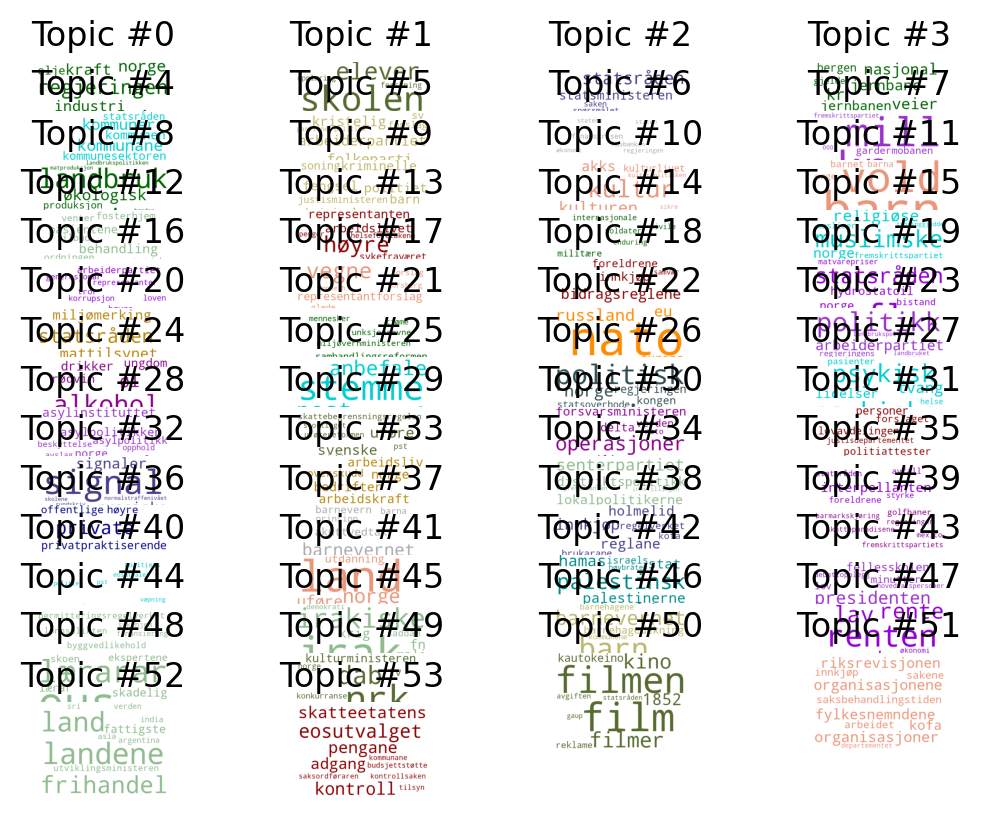

In [19]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds(formatted_topics, f"{model_name}-{embedding_model}: {data_type}", NUM_TOPICS, dpi=200)

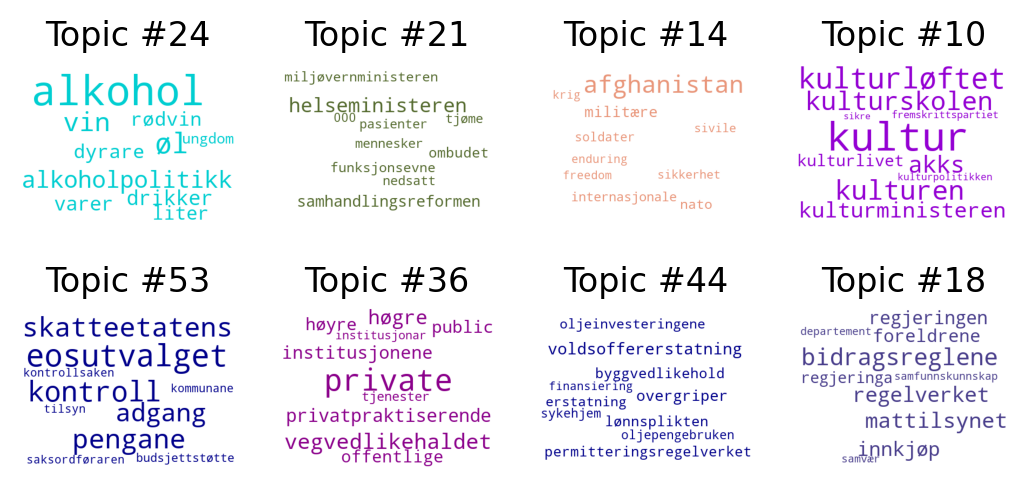

In [20]:
from utils.filemanagement import make_excerpt_wordcloud


excerpt_wordcloud = make_excerpt_wordcloud(formatted_topics,NUM_TOPICS,f"Sample from {model_name}-{embedding_model}: {data_type}",random_sample=random_sample,seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

In [21]:
from utils.tables_and_plots import create_wordcloud


wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))
file_name_model = "wordcloud"
for i in range(NUM_TOPICS):
    topic_wordcloud = create_wordcloud(dict(topics[i]))
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [22]:
from utils.filemanagement import write_topics_file
topic_words_numbered = []
for i, key in enumerate(topics.keys()):
    if key == -1:
        continue
    r = topics[key]
    rr = []
    for item in r:
        rr.append(item[0])
    topic_words_numbered.append((i,rr))


write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [23]:
from utils.filemanagement import load_model_topics


loaded_topics = load_model_topics(folder_path_topics, file_name)


In [24]:
folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [25]:
from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [26]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [27]:
from utils.stats import compute_metrics

coherence, diversity = compute_metrics(
    loaded_topics.values(), word_frequencies, word_co_frequencies, 10)

10
('energi', 'regjeringen') wordtuple
('energi', 'regjeringen') wordup
324.0 over
378276.0 under
-10.189229717991413 -8.339850002884624 1.2217521555504136 ('energi', 'regjeringen') 324 174 2174
('energi', 'gasskraftverk') wordtuple
('energi', 'gasskraftverk') wordup
40.0 over
18096.0 under
-8.82145511910246 -5.321928094887363 1.6575675134688501 ('energi', 'gasskraftverk') 40 174 104
('energi', 'norge') wordtuple
('energi', 'norge') wordup
361.0 over
350958.0 under
-9.925083837574519 -8.49585502688717 1.1682266006381008 ('energi', 'norge') 361 174 2017
('energi', 'kraft') wordtuple
('energi', 'kraft') wordup
112.0 over
24534.0 under
-7.775139926189918 -6.807354922057604 1.1421675548305024 ('energi', 'kraft') 112 174 141
('energi', 'industri') wordtuple
('energi', 'industri') wordup
79.0 over
21228.0 under
-8.069900085234512 -6.303780748177103 1.2801682684741418 ('energi', 'industri') 79 174 122
('energi', 'olje') wordtuple
('energi', 'olje') wordup
74.0 over
22968.0 under
-8.2778842495

In [28]:
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.07184982760628893


In [29]:
print(diversity)

0.8


In [30]:
print(coherence)

1.3143029717858792


In [31]:
from tabulate import tabulate
import csv

In [32]:
# Check the stats for the dataset after running basic pipeline

models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒═════════════════════════════════════════════════╤═══════════╤═════════╕
│ Model                                           │ Metric    │   Value │
╞═════════════════════════════════════════════════╪═══════════╪═════════╡
│ bertopic_all-roberta-large-v1_np_mini_stopwords │ coherence │  1.3143 │
├─────────────────────────────────────────────────┼───────────┼─────────┤
│ bertopic_all-roberta-large-v1_np_mini_stopwords │ diversity │  0.8    │
╘═════════════════════════════════════════════════╧═══════════╧═════════╛


In [33]:
# Save all topic stats to file

topic_stats_folder_path = f"preprocessed_data/metrics/{experiment}/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})